<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


## <o>Day 06</o>: <m>(__Num 4 ML__)</m>

> <c>Applications of Matrix Decompositions</c> 
##### <m> SVD </m>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD

import time
%matplotlib inline

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


#### <m> KNN classification without DR </m>

In [2]:
Data = pd.read_csv("./Datasets/train.csv")
Y = Data['label']
X = Data.drop("label",axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

startTime = time.time()
Model1 = KNeighborsClassifier(n_neighbors=4,algorithm='ball_tree')
Model1.fit(X_train,Y_train)
Prediction1 = Model1.predict(X_test)

Error = (Y_test != Prediction1).sum()
ErrorRate = (Error/float(X_test.shape[0])) * 100
endTime = time.time()

print(f"Time consumed for getting {ErrorRate} is {endTime-startTime} seconds.")

Time consumed for getting 3.6825396825396823 is 142.40779566764832 seconds.


In [4]:
startTime = time.time()
SVD = TruncatedSVD(n_components=150)
SVD.fit(X_train)

X_train_transformed = SVD.transform(X_train)
X_test_transformed = SVD.transform(X_test)

print(f"SVD transformation time is {time.time()-startTime} seconds.")

startTime = time.time()
Model1.fit(X_train_transformed,Y_train)
Prediction2 = Model1.predict(X_test_transformed)

Error2 = (Y_test != Prediction2).sum()
ErrorRate2 = (Error2/float(X_test_transformed.shape[0])) * 100
endTime = time.time()
print(f"Time consumed for getting {ErrorRate2} is {endTime-startTime} seconds.")

SVD transformation time is 17.985694646835327 seconds.
Time consumed for getting 3.3968253968253967 is 39.15438508987427 seconds.


<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <m>Optimization</m>
>> <c>Single variable function</c>

Iterations
$$ x_{t+1} = x_t - \lambda f^{\prime}(x_t) $$
until $|x_{t+1} - x_{t}| < \epsilon $

In [2]:
def plot(x,xd,f,title):

    y = f(x)
    plt.plot(x,y,'b--')
    plt.plot(xd,f(xd),'r*')
    plt.title(title)
    plt.show()

def function(x):
    return 0.1*x**2 + np.sin(0.1*x**2)

def dfunction(x):
    return 0.2*x + 0.2*x*np.cos(0.1*(x**2))


def GradDescent(df,xtp,lr,epsilon,sequence):
    iter = 1
    xtn = xtp - lr * df(xtp)
    sequence = np.append(sequence,xtn)
    
    while abs(xtn - xtp) > epsilon:
        xtp = xtn
        xtn = xtp - lr * df(xtp)
        sequence = np.append(sequence,xtn)
        iter += 1
    
    return (xtn,sequence,iter)
    

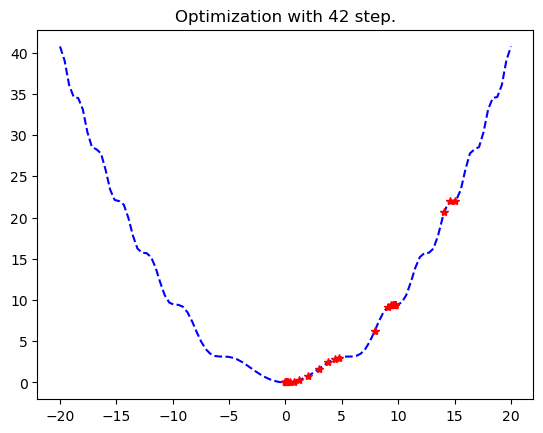

In [3]:
xn, Points, iter = GradDescent(df=dfunction,xtp=15,lr=1.0,sequence=np.array([15]),epsilon=0.001)
x = np.linspace(-20,20,num=100)
plot(x=x,xd=Points,f=function,title=f"Optimization with {iter} step.")

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <o>Lower learning rate</o>

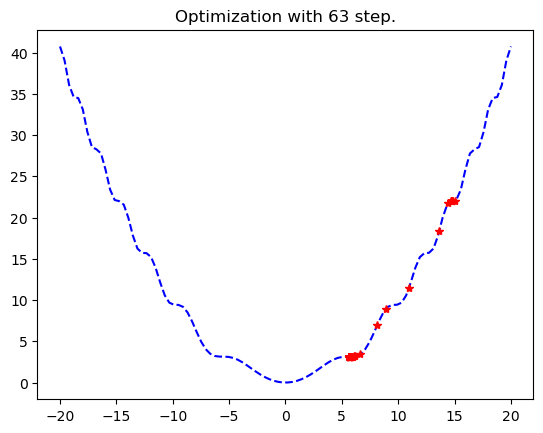

In [4]:
xn, Points, iter = GradDescent(df=dfunction,xtp=15,lr=0.5,sequence=np.array([15]),epsilon=0.001)
x = np.linspace(-20,20,num=100)
plot(x=x,xd=Points,f=function,title=f"Optimization with {iter} step.")

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

#### <c> Real ML problem </c>

>> <m> Boundary region </m>

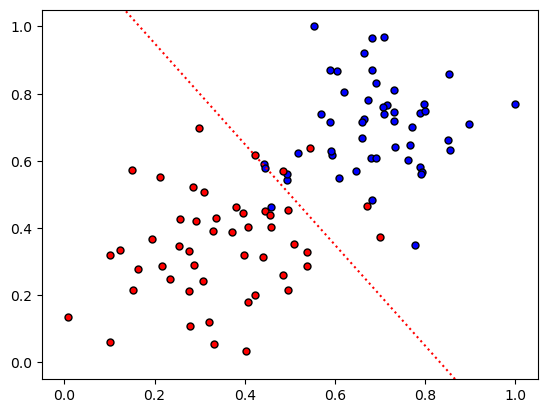

In [5]:
def Lines(m,b,color='b--',lw=0.1):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10,10,0.1)
    plt.plot(x,m*x+b,color,lw)
    

Blobs = pd.read_csv("./Datasets/Blobs.csv",header=None)
X = np.array(Blobs[[0,1]])
y = np.array(Blobs[2])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]

plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
Lines(-1.5,1.25,color='r:',lw=2.0)
plt.show()


- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

At epoch 0, The Train loss: 0.8697724436885472, and Accuracy is 0.5.
At epoch 1, The Train loss: 0.8014467002507846, and Accuracy is 0.5.
At epoch 2, The Train loss: 0.7217794524930199, and Accuracy is 0.5.
At epoch 3, The Train loss: 0.6540029242711978, and Accuracy is 0.52.
At epoch 4, The Train loss: 0.5971046140683754, and Accuracy is 0.56.
At epoch 5, The Train loss: 0.5492501247055196, and Accuracy is 0.63.
At epoch 6, The Train loss: 0.5088284183557014, and Accuracy is 0.68.
At epoch 7, The Train loss: 0.47449572096577347, and Accuracy is 0.71.
At epoch 8, The Train loss: 0.44515272970998615, and Accuracy is 0.73.
At epoch 9, The Train loss: 0.41990943963134236, and Accuracy is 0.75.
At epoch 10, The Train loss: 0.3980487546920077, and Accuracy is 0.78.
At epoch 11, The Train loss: 0.3789934985857509, and Accuracy is 0.82.
At epoch 12, The Train loss: 0.36227841941699546, and Accuracy is 0.83.
At epoch 13, The Train loss: 0.34752728829435786, and Accuracy is 0.85.
At epoch 14, T

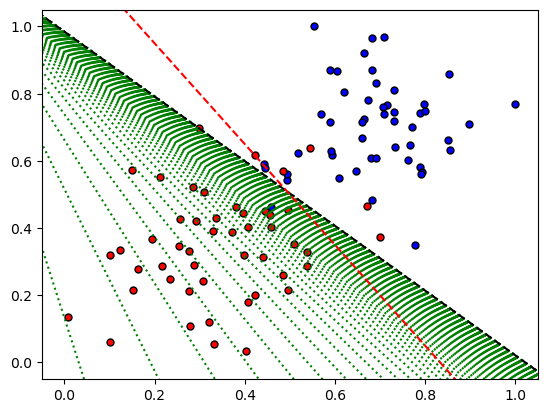

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def affine(x,w,b):
    return sigmoid(np.dot(x,w)+b)

def loss(y,yhat):
    return -y*np.log(yhat) - (1-y)*np.log(1-yhat)

def update(x,y,w,b,lr):
    yhat = affine(x,w,b)
    error = y-yhat
    w += lr * error * x
    b += lr * error
    return w,b

def train(X,yT,epochs,lr,plot_lines=False):
    errors = []
    N,M = X.shape
    w = np.random.normal(scale=1/M**0.5,size=M)
    b = 0
    for i in range(epochs):
        for x0,y0 in zip(X,yT):
            w,b = update(x0,y0,w,b,lr)
        yhat = affine(X,w,b)
        err = np.mean(loss(yT,yhat))
        if i % (epochs/100) == 0:
            prediction = yhat > 0.5
            accuracy = np.mean(prediction == yT)
            print(f"At epoch {i}, The Train loss: {err}, and Accuracy is {accuracy}.")
        
        if plot_lines and i % (epochs/200) == 0:
            Lines(-w[0]/w[1],-b/w[1],color='g:',lw=0.1)
    
    
    Lines(-w[0]/w[1],-b/w[1],color='k--',lw=1.5)
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
    Lines(-1.5,1.25,color='r--',lw=1.5)
    plt.show()
            
            
epochs = 100
lr = 0.1
train(X,y,epochs,lr,True)   
            

#### <m>Comparison of gradient descent algorithms </m>
<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

In [7]:

def Algorithms(X, y, learning_rate, num_iterations, algorithm):
    # Initialize parameters
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []

    for iteration in range(num_iterations):
        # Calculate predictions and errors
        predictions = X.dot(theta)
        errors = predictions - y

        # Update parameters based on the selected algorithm
        if algorithm == 'batch':
            gradient = (1 / m) * (X.T.dot(errors))
            theta = theta - learning_rate * gradient
        elif algorithm == 'stochastic':
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                prediction = xi.dot(theta)
                error = prediction - yi
                gradient = xi.T.dot(error)
                theta = theta - learning_rate * gradient
        elif algorithm == 'mini-batch':
            batch_size = 50
            random_indices = np.random.choice(m, batch_size, replace=False)
            xi = X[random_indices]
            yi = y[random_indices]
            predictions = xi.dot(theta)
            errors = predictions - yi
            gradient = (1 / batch_size) * (xi.T.dot(errors))
            theta = theta - learning_rate * gradient
        else:
            raise ValueError('Please choose either "batch", "stochastic", or "mini-batch".')

        # Calculate and store the loss
        loss = np.mean(errors**2)
        loss_history.append(loss)

    return theta, loss_history

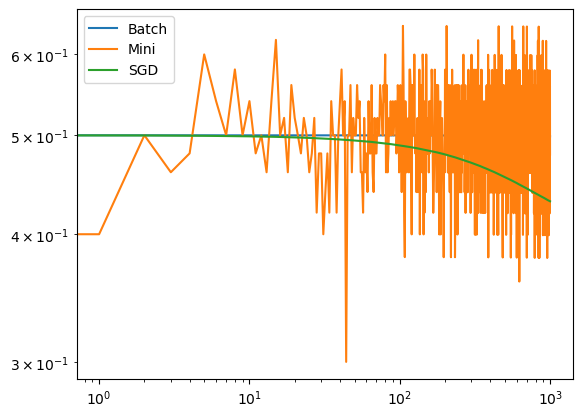

In [9]:

learning_rate = 1e-5
num_iterations = 1000
theta_batch, loss_history_batch = Algorithms(X, y, learning_rate, num_iterations, 'batch')
theta_stochastic, loss_history_stochastic = Algorithms(X, y, learning_rate, num_iterations, 'stochastic')
theta_mini_batch, loss_history_mini_batch = Algorithms(X, y, learning_rate, num_iterations, 'mini-batch')

plt.loglog(loss_history_batch,label='Batch')
plt.loglog(loss_history_mini_batch,label='Mini')
plt.loglog(loss_history_stochastic,label="SGD")
plt.legend()
plt.show()